In [1]:
#customerID  string
#Customer ID

#gender string
#Customer gender (female, male)

#SeniorCitizen bool
#Whether the customer is a senior citizen or not (1, 0)

#Partner bool
#Whether the customer has a partner or not (Yes, No)

#Dependents bool
#Whether the customer has dependents or not (Yes, No)

#tenure int64
#Number of months the customer has stayed with the company

#PhoneService bool
#Whether the customer has a phone service or not (Yes, No)

#MultipleLines bool
#Whether the customer has multiple lines or not (Yes, No, No phone service)

#InternetService	string
#Customer’s internet service provider (DSL, Fiber optic, No)

#OnlineSecurity bool
#Whether the customer has online security or not (Yes, No, No internet service)

#OnlineBackup  bool
#Whether the customer has online backup or not (Yes, No, No internet service)

#DeviceProtection bool
#Whether the customer has device protection or not (Yes, No, No internet service)

#TechSupport bool
#Whether the customer has tech support or not (Yes, No, No internet service)

#StreamingTV bool
#Whether the customer has streaming TV or not (Yes, No, No internet service)

#StreamingMovies bool
#Whether the customer has streaming movies or not (Yes, No, No internet service)

#Contract string
#The contract term of the customer (Month-to-month, One year, Two year)

#PaperlessBilling bool
#Whether the customer has paperless billing or not (Yes, No)

#PaymentMethod string
#The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

#MonthlyCharges float64
#The amount charged to the customer monthly

#TotalCharges float64
#The total amount charged to the customer

#Churn bool
#Whether the customer churned or not (Yes or No)

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
data = pd.read_csv(r'Telecom-Customer-Churn.csv')

In [4]:
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
fig =  ff.create_table(data.head(),colorscale = colorscale)
fig.layout.width=3500
fig.show()

In [5]:
# drop customerID column
data = data.drop('customerID',axis=1)

In [6]:
churn     = data[data["Churn"] == "Yes"]
not_churn = data[data["Churn"] == "No"]

In [7]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [8]:
print("dataframe shape: ",data.shape)


dataframe shape:  (7043, 20)


In [9]:
# numeric columns
print("Numeric Columns:\n")
for col in data.columns:
    if(data[col].dtype=="int64" or data[col].dtype=="float64" ):
        print(col)

Numeric Columns:

SeniorCitizen
tenure
MonthlyCharges


In [10]:
# categorical columns

print("Categorical Columns:\n")
for col in data.columns:
    if(data[col].dtype=="object"):
        print(col)

Categorical Columns:

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [11]:
# Handling empty values in Total Charges

for i in range(len(data)):
    if(data['TotalCharges'].loc[i] == ' '):
        data['TotalCharges'].loc[i] = 0

In [12]:
# TotalCharges is in object datatype convert it to float type

data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], downcast="float")

In [13]:
data["TotalCharges"].dtype

dtype('float32')

In [14]:
# Checking for null values in each columns

null_values = data.isnull().sum().sort_values(ascending=False)
null_values = pd.DataFrame(null_values).reset_index()
null_values.columns = ['Column Name', 'No. of null values']
null_values.style.background_gradient(cmap='twilight_r')

In [15]:
numerics = ['float64', 'int64','float32']
numeric_ds = data.select_dtypes(include=numerics) 
objects_ds = data.select_dtypes(exclude=numerics)

In [16]:
numeric_ds.describe().T

count         mean          std    min         25%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.000000   
tenure          7043.0    32.371149    24.559481   0.00    9.000000   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.500000   
TotalCharges    7043.0  2279.732178  2266.794434   0.00  398.549988   

                        50%          75%          max  
SeniorCitizen      0.000000     0.000000     1.000000  
tenure            29.000000    55.000000    72.000000  
MonthlyCharges    70.350000    89.850000   118.750000  
TotalCharges    1394.550049  3786.599976  8684.799805

In [17]:
objects_ds.describe().T

count unique               top  freq
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
Churn             7043      2                No  5174

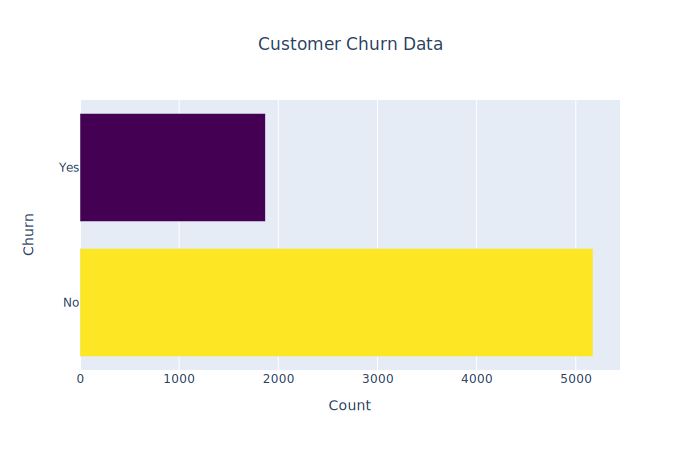

In [18]:
data_churn = data['Churn'].value_counts().reset_index()
fig = go.Figure(go.Bar(y=data_churn['index'], x=data_churn['Churn'],marker={'color': data_churn['Churn'], 'colorscale': 'Viridis'},orientation='h'))
fig.update_layout(title_text='Customer Churn Data',title_x=0.5,yaxis_title="Churn",xaxis_title="Count")
fig.show('svg')

In [19]:
def count_plots(column):
    data_ch = churn[column].value_counts().reset_index()
    data_ch.columns = [column,'Count']
    data_nch = not_churn[column].value_counts().reset_index()
    data_nch.columns = [column,'Count']
    trace1 = go.Bar(x = data_ch[column]  , y = data_ch["Count"],
                    name = "Churn Customers",
                    marker = dict(line = dict(width = .5,color = "black")),
                    opacity = .9)

    trace2 = go.Bar(x = data_nch[column] , y = data_nch["Count"],
                    name = "Non Churn Customers",
                    marker = dict(line = dict(width = .5,color = "black")),
                    opacity = .9)
    layout = go.Layout(dict(title = "Customer Churn Across " + column,
                            title_x=0.5,
                            xaxis = dict(title = column),
                            yaxis = dict(title = "Count"),
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data=data,layout=layout)
    fig.show('svg')

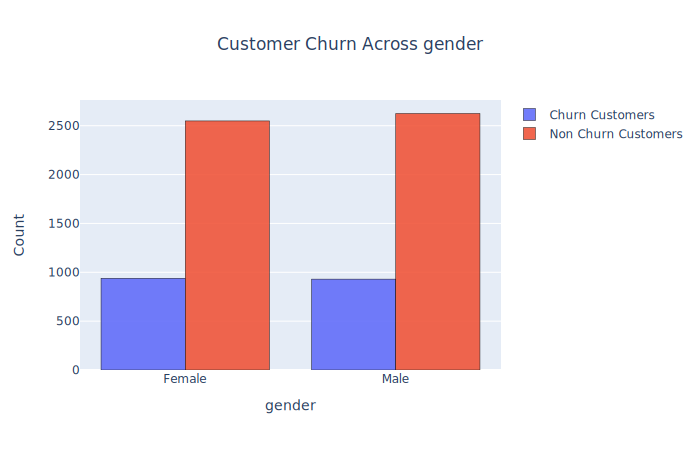

In [20]:
count_plots("gender")

#### Gender is not an indicative of churn

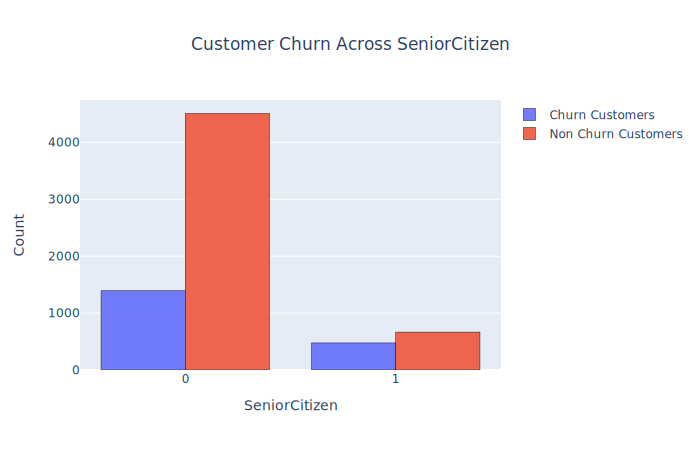

In [21]:
count_plots("SeniorCitizen")

#### Even though there are less senior citizens their churn rate is nearly 58% more than non-senior citizens

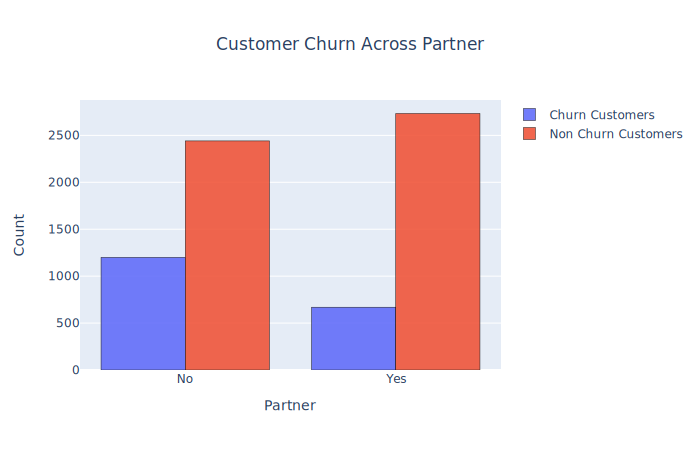

In [22]:
count_plots("Partner")

#### Customers with no partners are more likely to be churned

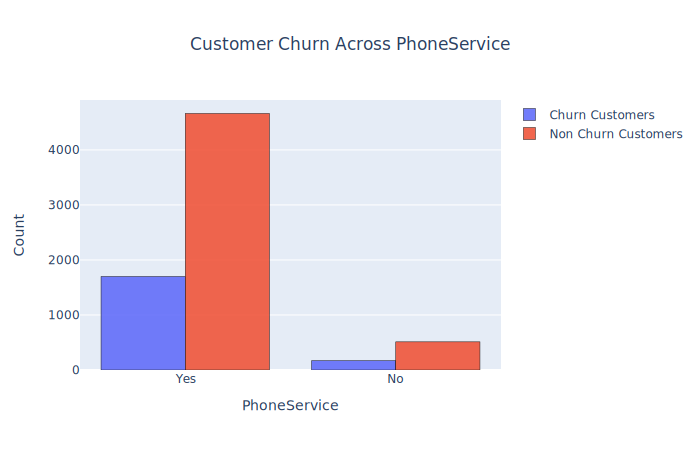

In [23]:
count_plots("PhoneService")

#### Phone Service doesnt tell much about churn rate

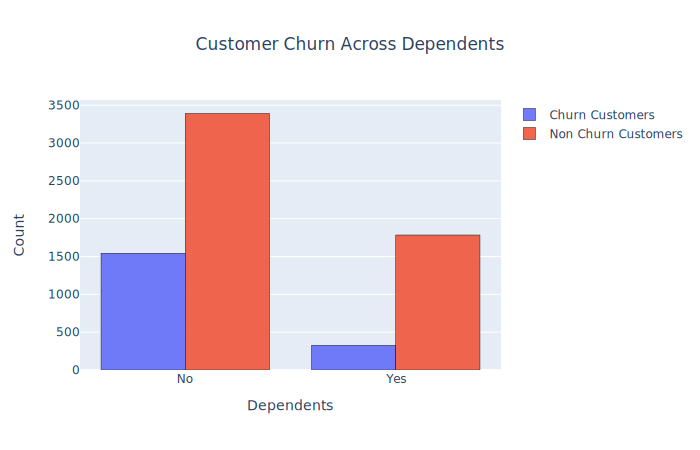

In [24]:
count_plots("Dependents")

#### Customers with no dependents are more likely to be churned

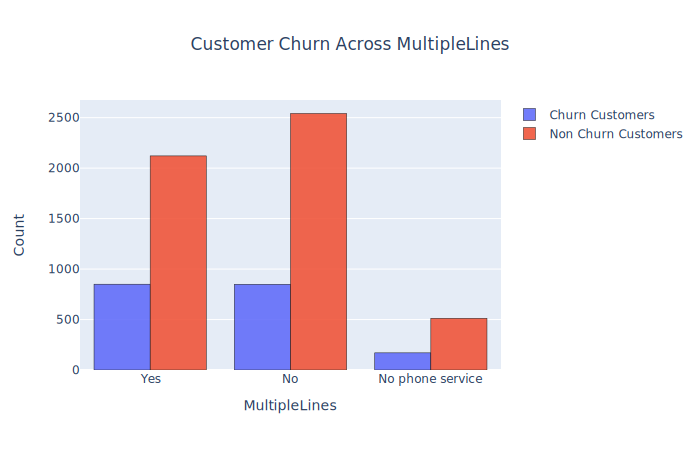

In [25]:
count_plots("MultipleLines")

#### By comparing having multiples and no multiplelines customers with no multiplelines are less likely to be churned

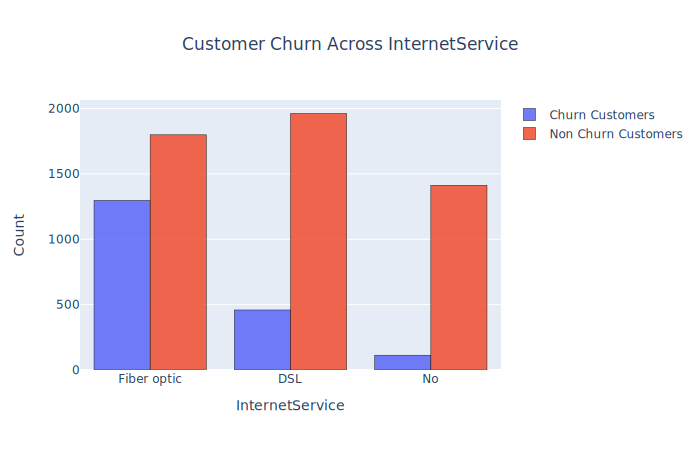

In [26]:
count_plots("InternetService")

#### Customers with no internet service are less likely to be churned
#### Customers with fiber optic service is more likely to be churned

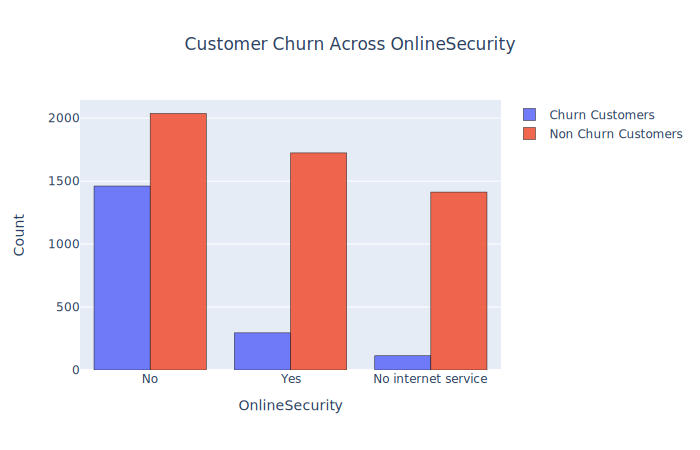

In [27]:
count_plots("OnlineSecurity")

#### Customers with no online security are more likely to churn

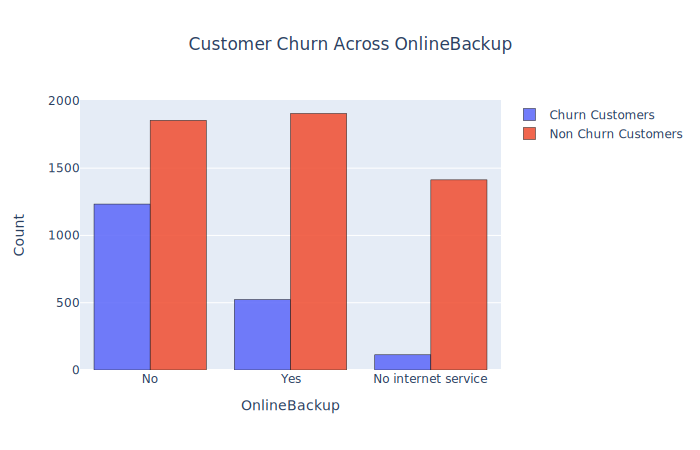

In [28]:
count_plots("OnlineBackup")

#### Customers having no online backup are more likely to churn

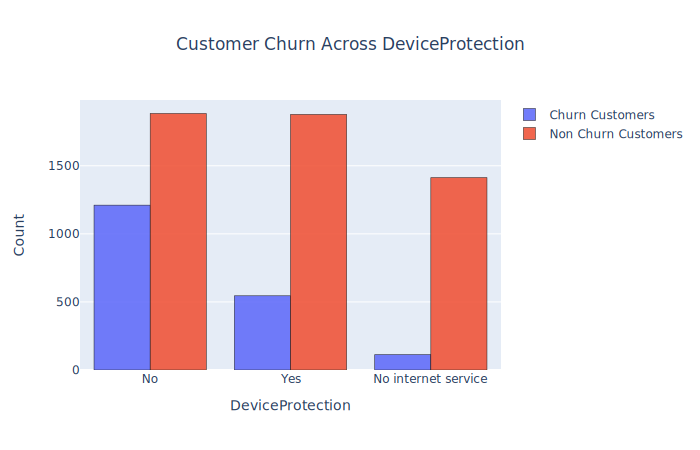

In [29]:
count_plots("DeviceProtection")

#### Customers having no Device Protection are more likely to churn

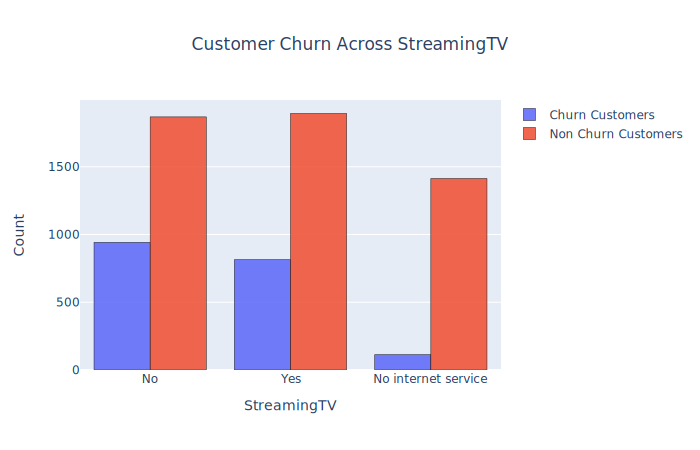

In [30]:
count_plots("StreamingTV")

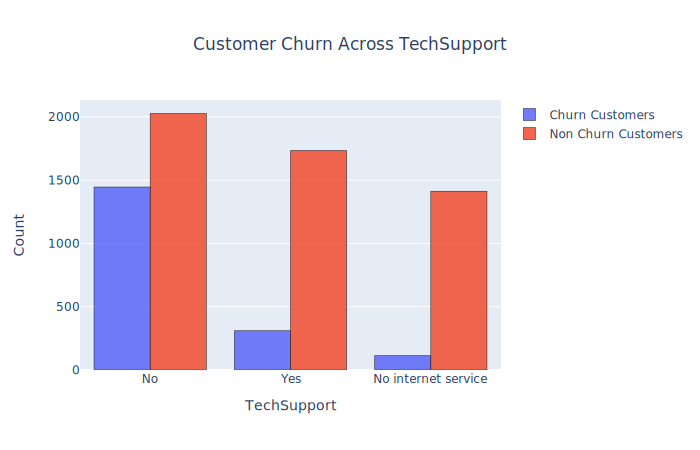

In [31]:
count_plots("TechSupport")

#### Customers having noTech Support are more likely to churn

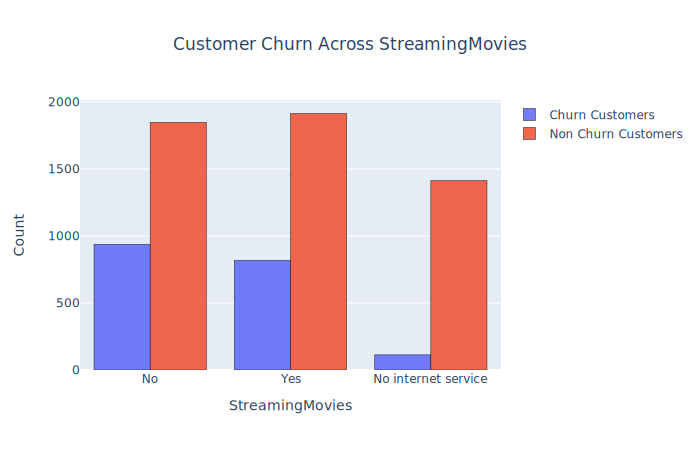

In [32]:
count_plots("StreamingMovies")

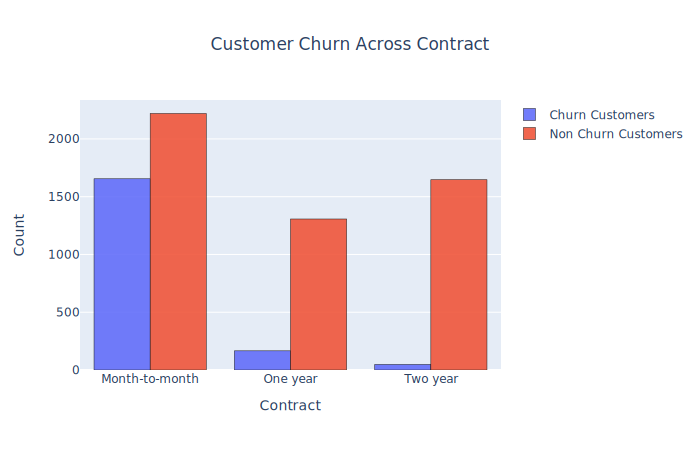

In [33]:
count_plots("Contract")

#### Customers having month-to-month contract are more likely to churn and having one year or two year are less likely to churn

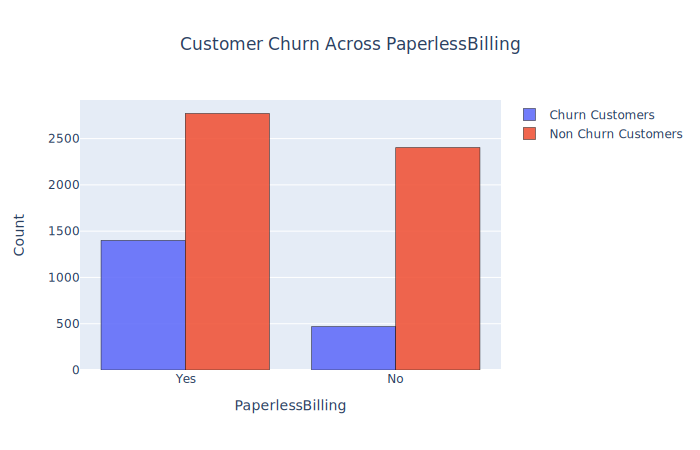

In [34]:
count_plots("PaperlessBilling")

#### PaperlessBilling doesnt much convey about churn rate

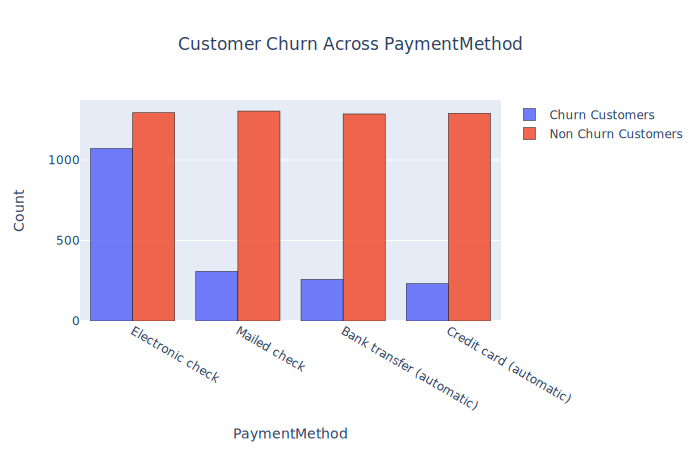

In [35]:
count_plots("PaymentMethod")

#### payment method of electronic check is having most churn rate

#### Finally No tech support, online backup, online security, partner, dependents and device support are more likely to churn

In [36]:
df_sub = data[['tenure','MonthlyCharges','TotalCharges','Churn']]

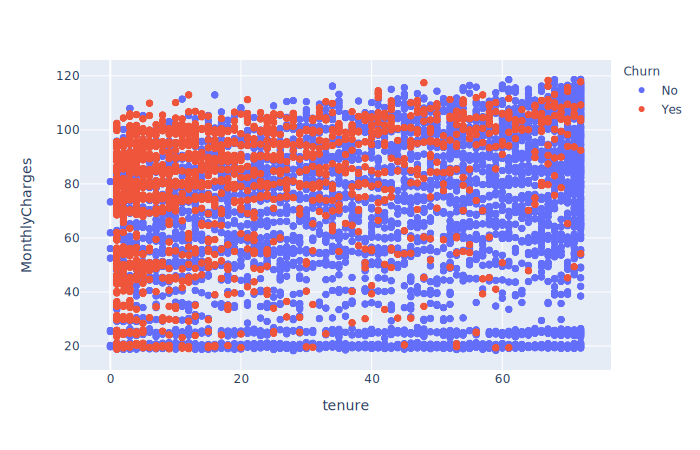

In [37]:
fig1=px.scatter(df_sub,x="tenure",y="MonthlyCharges",color='Churn')
fig1.show('svg')

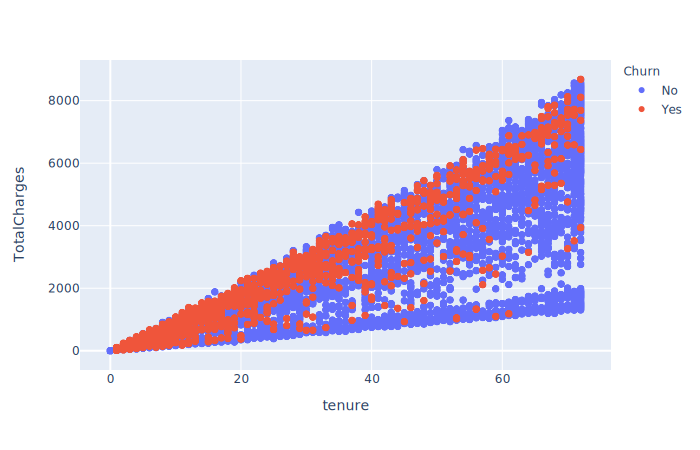

In [38]:
fig2=px.scatter(df_sub,x="tenure",y="TotalCharges",color='Churn')
fig2.show('svg')


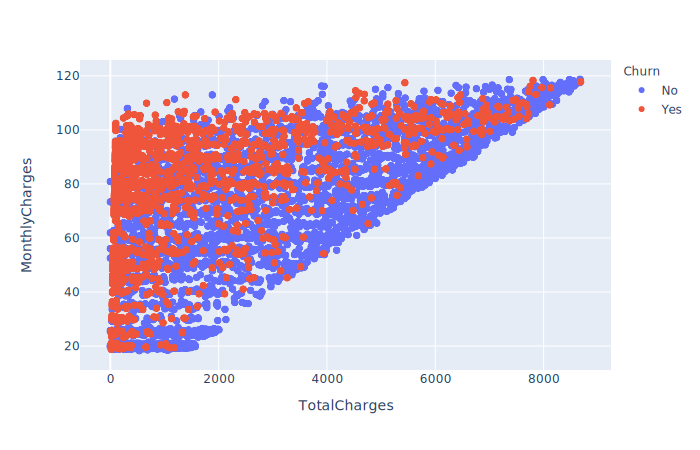

In [39]:
fig3=px.scatter(df_sub,x="TotalCharges",y="MonthlyCharges",color='Churn')
fig3.show('svg')

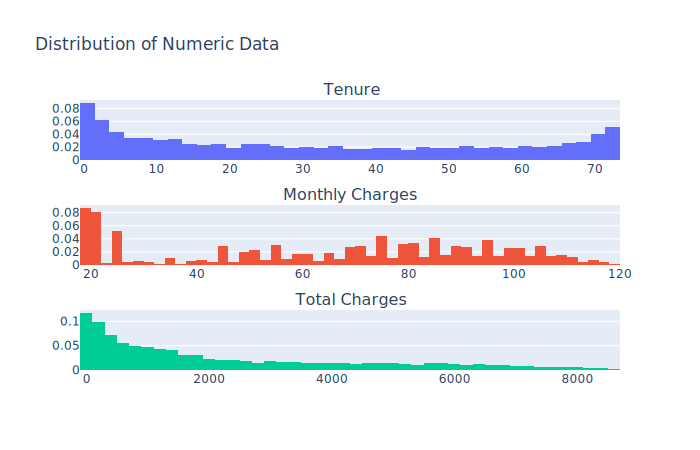

In [40]:
# knowing the distribution of numeric_data:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1,subplot_titles=("Tenure","Monthly Charges", "Total Charges"))

fig.append_trace(go.Histogram(x=data['tenure'], histnorm='probability'), row=1, col=1)

fig.append_trace(go.Histogram(x=data['MonthlyCharges'], histnorm='probability'), row=2, col=1)

fig.append_trace(go.Histogram(x=data['TotalCharges'], histnorm='probability'), row=3, col=1)


fig.update_layout(height=600, width=600, title_text="Distribution of Numeric Data",showlegend=False)
fig.show('svg')

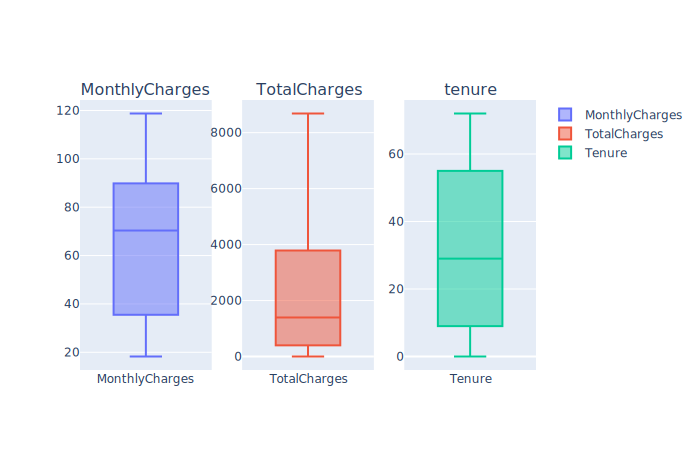

In [41]:
fig = make_subplots(rows=1, cols=3,subplot_titles=("MonthlyCharges", "TotalCharges", "tenure"),column_widths=[1, 1,1])
fig.add_trace(go.Box(y=data['MonthlyCharges'],name="MonthlyCharges"),row=1, col=1)
fig.add_trace(go.Box(y=data['TotalCharges'],name="TotalCharges"),row=1, col=2)
fig.add_trace(go.Box(y=data['tenure'],name="Tenure"),row=1, col=3)
fig.show('svg')

In [42]:
def violin_plots(col1,col2):

    fig = go.Figure()

    fig.add_trace(go.Violin(x=data[col1][ data['Churn'] == 'Yes' ],
                            y=data[col2][ data['Churn'] == 'Yes' ],
                            legendgroup='Yes', scalegroup='Yes', name='Yes',
                            side='negative',
                            line_color='blue'))

    fig.add_trace(go.Violin(x=data[col1][ data['Churn'] == 'No' ],
                            y=data[col2][ data['Churn'] == 'No' ],
                            legendgroup='No', scalegroup='No', name='No',
                            side='positive',
                            line_color='orange'))

    fig.update_traces(meanline_visible=True)
    fig.update_layout(violingap=0, violinmode='overlay')
    fig.show('svg')


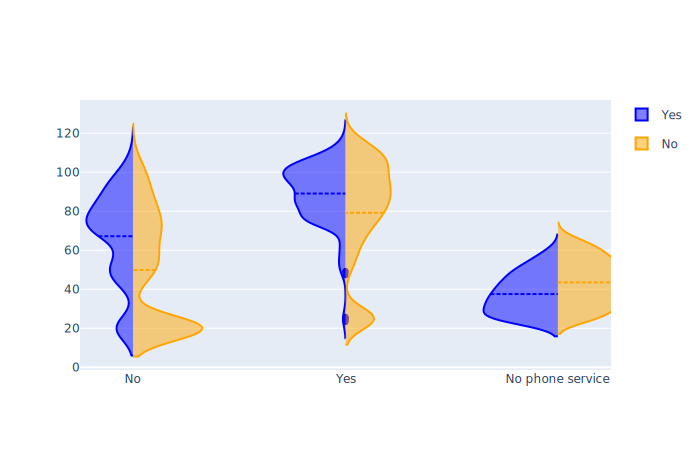

In [43]:
violin_plots('MultipleLines','MonthlyCharges')

#### We can see customers with no multiplelines and paying less monthly charges have less churn probability

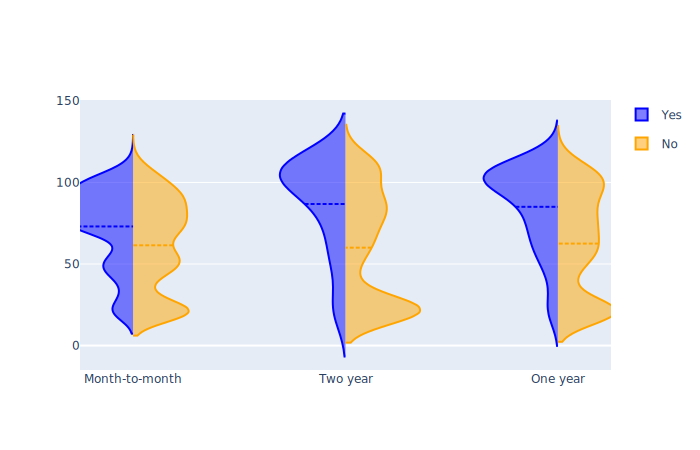

In [44]:
violin_plots("Contract","MonthlyCharges")

#### Here both Two year and One Year Contract have Same trend but in all the three customers paying high monthly charges are most likely to churn

## Data Preparation

In [45]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85     29.850000   
1               No               Mailed check           56.95   1889.500000   
2              Yes               Mailed check           53.85    108.150002   
3               No  Bank transfer (automatic)           42.30   1840.750000   
4              Yes           Electronic check           70.70    151.649994   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

#### Converting Binary Columns 

In [46]:
data['gender'] = data['gender'].replace({'Female':0,'Male':1})
data['Partner'] = data['Partner'].replace({'Yes':1,'No':0})
data['Dependents'] = data['Dependents'].replace({'Yes':1,'No':0})
data['PhoneService'] = data['PhoneService'].replace({'Yes':1,'No':0})
data['PaperlessBilling'] = data['PaperlessBilling'].replace({'Yes':1,'No':0})
data['Churn'] = data['Churn'].replace({'Yes':1,'No':0})

In [47]:
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0                 1           Electronic check           29.85     29.850000   
1                 0               Mailed check           56.95   1889.500000   
2                 1               Mailed check           53.85    108.150002   
3                 0  Bank transfer (automatic)           42.30   1840.750000   
4                 1           Electronic check           70.70    151.649994   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

#### Creating dummy variables for categorical columns

In [48]:
category_cols=['PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

for cc in category_cols:
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}_".format(cc))
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)

In [49]:
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85     29.850000      0  ...   
1                 0           56.95   1889.500000      0  ...   
2                 1           53.85    108.150002      1  ...   
3                 0           42.30   1840.750000      0  ...   
4                 1           70.70    151.649994      1  ...   

   TechSupport_Yes  StreamingTV_No  StreamingTV_No internet service  \
0                0               1                                0   
1                0               1                                0   
2                0               1                                0   
3                1               1                                0   
4                0               1                                0   

   StreamingTV_Yes  StreamingMovies_No  StreamingMovies_No internet service  \
0                0                   1                                    0   
1                0                   1                                    0   
2                0                   1                                    0   
3                0                   1                                    0   
4                0                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 41 columns]

## Feature Engineering

#### Correlation of Churn attribute with others

In [50]:
corr_churn = data.corr()['Churn'].sort_values(ascending = False)
corr_churn = pd.DataFrame(corr_churn).reset_index()
corr_churn.columns = ['Column Name', 'Correlation']
corr_churn.style.background_gradient(cmap='twilight_r')

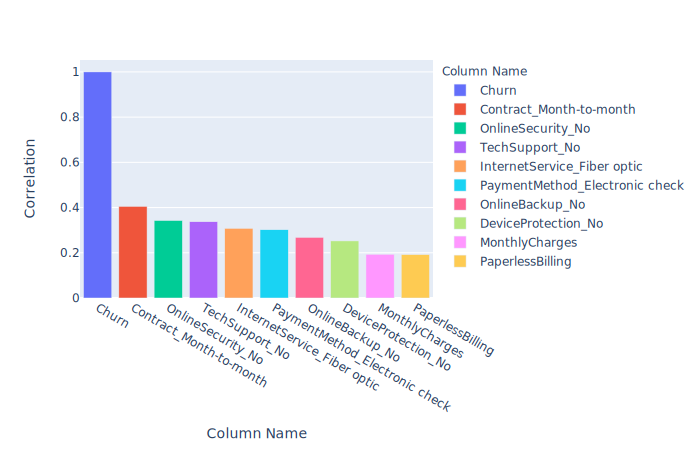

In [51]:
fig = px.bar(corr_churn[:10], x='Column Name', y='Correlation',color='Column Name')
fig.show('svg')

#### month to month contracts, no online security and no tech suport are positively correlated with churn whereas tenure and two year contracts are negatively correlated

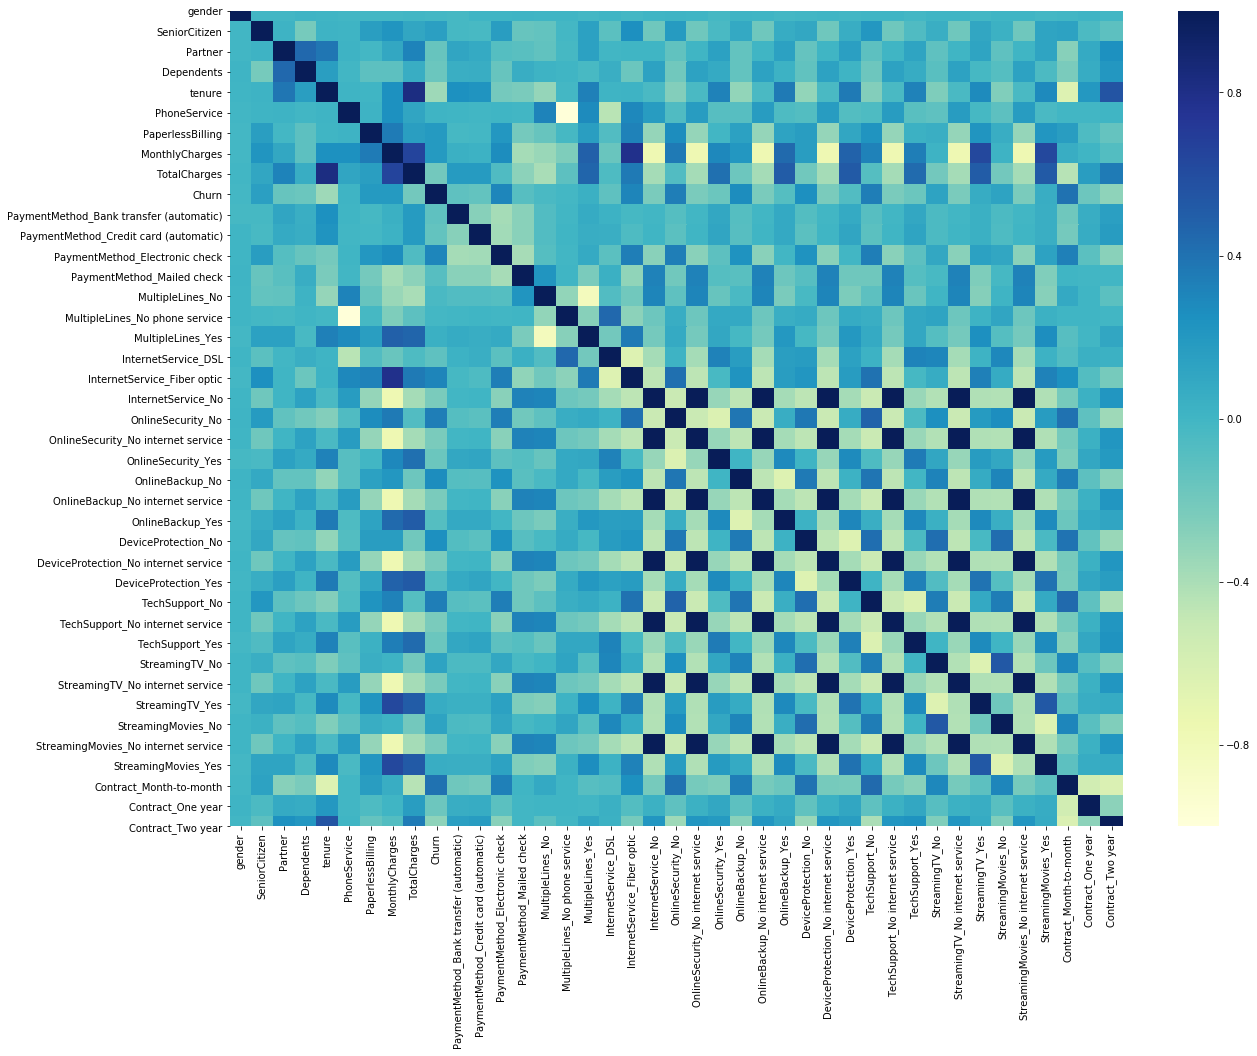

In [52]:
corr=data.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=False,cmap="YlGnBu")

#### Total Charges is highly correlated with Monthly charges and Tenure
#### No_internet service is highly correlated with all streaming and support without internet service
#### So the redundant attributes are Total Charges and No_Internet service

### Comparision of Model Performance with and without Redundant attributes

In [53]:
X = data.drop('Churn',axis=1)
y = data['Churn']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (4930, 40)
Shape of y_train:  (4930,)
Shape of X_test:  (2113, 40)
Shape of y_test:  (2113,)


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression()

model_lr = lr.fit(X_train,y_train) 

In [57]:
pred_lr = model_lr.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
acc_score = accuracy_score(y_test,pred_lr)
print(acc_score*100)

80.92759110269758


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.55      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



#### Removing Redundant Attributes

In [61]:
X_new = data.drop(['Churn','InternetService_No','TotalCharges'],axis=1)

In [62]:
X_new.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  PaymentMethod_Bank transfer (automatic)  \
0                 1           29.85                                        0   
1                 0           56.95                                        0   
2                 1           53.85                                        0   
3                 0           42.30                                        1   
4                 1           70.70                                        0   

   PaymentMethod_Credit card (automatic)  ...  TechSupport_Yes  \
0                                      0  ...                0   
1                                      0  ...                0   
2                                      0  ...                0   
3                                      0  ...                1   
4                                      0  ...                0   

   StreamingTV_No  StreamingTV_No internet service  StreamingTV_Yes  \
0               1                                0                0   
1               1                                0                0   
2               1                                0                0   
3               1                                0                0   
4               1                                0                0   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   1                                    0   
1                   1                                    0   
2                   1                                    0   
3                   1                                    0   
4                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 38 columns]

In [63]:
y_new = data['Churn']

In [64]:
y_new.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [65]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [66]:
model_lr_new = lr.fit(X_train_new,y_train_new) 
pred_lr_new = model_lr_new.predict(X_test_new)
acc_score_new = accuracy_score(y_test_new,pred_lr_new)
print(acc_score_new*100)

81.11689540937056


#### We can see a slight improvement in performance of model

In [67]:
print(classification_report(y_test_new,pred_lr_new))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.69      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.80      2113



In [68]:
len(X_train_new.columns)

38

#### Now our model consists of 38 features. To consider important features for our model building we use two methods
#### 1. Feature importance using Random Forest Classifier
#### 2. Recursive Feature Elimination using Logistic Regression

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
model_rf = rf.fit(X_train_new,y_train)

In [70]:
columns = X_train_new.columns

In [71]:
feature_list = list(zip(list(rf.feature_importances_), list(columns)))

In [72]:
sorted(feature_list,reverse=True)

[(0.21168589355821246, 'tenure'),
 (0.19736360328356234, 'MonthlyCharges'),
 (0.04743665494676498, 'Contract_Month-to-month'),
 (0.03360253753987501, 'gender'),
 (0.03196824939876917, 'PaymentMethod_Electronic check'),
 (0.03127651967142913, 'OnlineSecurity_No'),
 (0.030472214045107592, 'InternetService_Fiber optic'),
 (0.030098388973486774, 'PaperlessBilling'),
 (0.02878009095065652, 'Partner'),
 (0.02554017878090025, 'TechSupport_No'),
 (0.024775548259969443, 'SeniorCitizen'),
 (0.023113088780937603, 'Dependents'),
 (0.021966732170185077, 'Contract_Two year'),
 (0.019789748066565492, 'OnlineBackup_No'),
 (0.016689002353751526, 'DeviceProtection_No'),
 (0.015394945122824593, 'MultipleLines_No'),
 (0.015111480267823883, 'PaymentMethod_Credit card (automatic)'),
 (0.014762279614582947, 'OnlineBackup_Yes'),
 (0.014629423010121339, 'PaymentMethod_Bank transfer (automatic)'),
 (0.014499638726770063, 'MultipleLines_Yes'),
 (0.013772692052610398, 'PaymentMethod_Mailed check'),
 (0.0134328055

#### Let's check whether our RFE method removes unimportant features

In [73]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold

Optimal number of features : 38


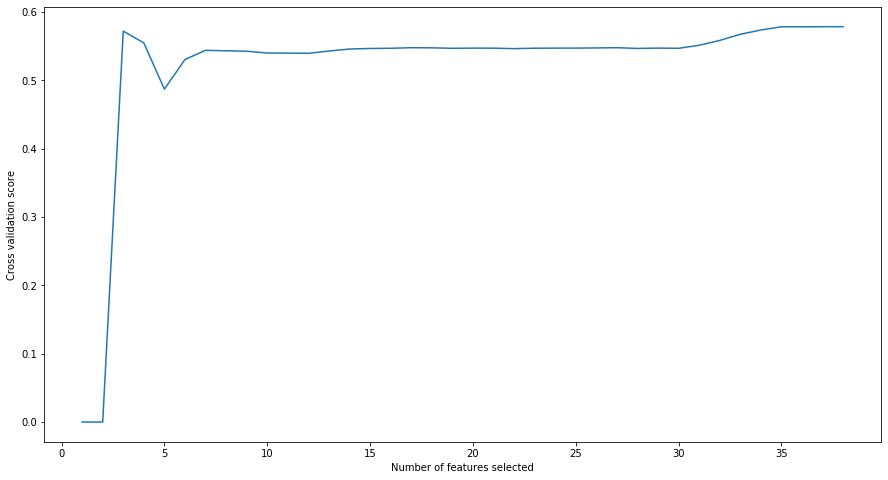

In [74]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
rfe = RFECV(estimator = lr,cv=cv,scoring='f1')
rfe.fit(X_train_new, y_train_new)
print("Optimal number of features : %d" % rfe.n_features_)
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [75]:
for i in range(X_train_new.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=True, Rank: 1
Column: 10, Selected=True, Rank: 1
Column: 11, Selected=True, Rank: 1
Column: 12, Selected=True, Rank: 1
Column: 13, Selected=True, Rank: 1
Column: 14, Selected=True, Rank: 1
Column: 15, Selected=True, Rank: 1
Column: 16, Selected=True, Rank: 1
Column: 17, Selected=True, Rank: 1
Column: 18, Selected=True, Rank: 1
Column: 19, Selected=True, Rank: 1
Column: 20, Selected=True, Rank: 1
Column: 21, Selected=True, Rank: 1
Column: 22, Selected=True, Rank: 1
Column: 23, Selected=True, Rank: 1
Column: 24, Selected=True, Rank: 1
Column: 25, Selected=True, Rank: 1
Column: 26, Selected=True, Rank: 1
Column: 27, Selected=True, Rank: 1
Column: 28, Selected=True, Ran

#### We can see by selecting all the features we got highest Score. So We proceed with all the features

### Handling Imbalance Dataset by Using Different Techinques and select the best technique to handle our case

#### Techniques we are going to use are
#### 1. Random OverSampling
#### 2. SMOTE
#### 3. Adasyn

### Random OverSampler

In [76]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train_new, y_train_new)

In [77]:
print("Shape of X_train: ",X_train_new.shape)
print("Shape of y_train: ",y_train_new.shape)
print("Shape of X_over: ",X_over.shape)
print("Shape of y_over: ",y_over.shape)

Shape of X_train:  (4930, 38)
Shape of y_train:  (4930,)
Shape of X_over:  (7270, 38)
Shape of y_over:  (7270,)


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
lr = LogisticRegression(random_state = 0)
dt = DecisionTreeClassifier(random_state = 0)
rf = RandomForestClassifier(random_state = 0)

In [80]:
model_lr_random = lr.fit(X_over,y_over)
model_dt_random = dt.fit(X_over,y_over)
model_rf_random = rf.fit(X_over,y_over)

In [81]:
pred_lr_random = model_lr_random.predict(X_test_new)
pred_dt_random = model_dt_random.predict(X_test_new)
pred_rf_random = model_rf_random.predict(X_test_new)

In [82]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [83]:
def print_metrics(true_labels,predicted_label_lr,predicted_label_dt,predicted_label_rf):
    print("Accuracy score of Logistic Regression: ",accuracy_score(true_labels,predicted_label_lr))
    print("Accuracy score of Decision Tree: ",accuracy_score(true_labels,predicted_label_dt))
    print("Accuracy score of Random Forest: ",accuracy_score(true_labels,predicted_label_rf))
    
    print("\n")
    
    print("Precision score of Logistic Regression: ",precision_score(true_labels,predicted_label_lr))
    print("Precision score of Decision Tree: ",precision_score(true_labels,predicted_label_dt))
    print("Precision score of Random Forest: ",precision_score(true_labels,predicted_label_rf))
    
    print("\n")
    
    print("Recall score of Logistic Regression: ",recall_score(true_labels,predicted_label_lr))
    print("Recall score of Decision Tree: ",recall_score(true_labels,predicted_label_dt))
    print("Recall score of Random Forest: ",recall_score(true_labels,predicted_label_rf))

In [84]:
print_metrics(y_test_new,pred_lr_random,pred_dt_random,pred_rf_random)

Accuracy score of Logistic Regression:  0.7581637482252721
Accuracy score of Decision Tree:  0.7401798390913393
Accuracy score of Random Forest:  0.7718883104590629


Precision score of Logistic Regression:  0.5354330708661418
Precision score of Decision Tree:  0.5231053604436229
Precision score of Random Forest:  0.5824372759856631


Recall score of Logistic Regression:  0.8292682926829268
Recall score of Decision Tree:  0.4930313588850174
Recall score of Random Forest:  0.5662020905923345


In [85]:
def print_classification_reports(true_labels,predicted_label_lr,predicted_label_dt,predicted_label_rf):
    print("Classification Report of Logistic Regression:")
    print("\n")
    print(classification_report(true_labels,predicted_label_lr))
    
    print("\n")
    
    print("Classification Report of Decision Tree:")
    print("\n")
    print(classification_report(true_labels,predicted_label_dt))
    
    print("\n")

    print("Classification Report of Random Forest:")
    print("\n")
    print(classification_report(true_labels,predicted_label_rf))

In [86]:
print_classification_reports(y_test_new,pred_lr_random,pred_dt_random,pred_rf_random)

Classification Report of Logistic Regression:


              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1539
           1       0.54      0.83      0.65       574

    accuracy                           0.76      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.76      0.77      2113



Classification Report of Decision Tree:


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1539
           1       0.52      0.49      0.51       574

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.67      2113
weighted avg       0.74      0.74      0.74      2113



Classification Report of Random Forest:


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1539
           1       0.58      0.57      0.57       574

    accuracy                           0.77   

In [87]:
from sklearn.metrics import plot_confusion_matrix

def plot_confus_matrix(model,title):
    class_names = ['Not churned','churned']
    disp = plot_confusion_matrix(model, X_test_new, y_test_new,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

    disp.confusion_matrix

    plt.show()

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_new,pred_lr_random)

array([[1126,  413],
       [  98,  476]], dtype=int64)

In [89]:
confusion_matrix(y_test_new,pred_dt_random)

array([[1281,  258],
       [ 291,  283]], dtype=int64)

In [90]:
confusion_matrix(y_test_new,pred_rf_random)

array([[1306,  233],
       [ 249,  325]], dtype=int64)

### SMOTE

In [91]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

In [92]:
X_train_smote, y_train_smote = sm.fit_resample(X_train_new, y_train_new)

In [93]:
model_lr_smote = lr.fit(X_train_smote,y_train_smote)
model_dt_smote = dt.fit(X_train_smote,y_train_smote)
model_rf_smote = rf.fit(X_train_smote,y_train_smote)

In [94]:
pred_lr_smote = model_lr_smote.predict(X_test_new)
pred_dt_smote = model_dt_smote.predict(X_test_new)
pred_rf_smote = model_rf_smote.predict(X_test_new)

In [95]:
print_metrics(y_test_new,pred_lr_smote,pred_dt_smote,pred_rf_smote)

Accuracy score of Logistic Regression:  0.7851396119261713
Accuracy score of Decision Tree:  0.7103644107903455
Accuracy score of Random Forest:  0.7789872219592996


Precision score of Logistic Regression:  0.5970873786407767
Precision score of Decision Tree:  0.4692556634304207
Precision score of Random Forest:  0.6011342155009451


Recall score of Logistic Regression:  0.6428571428571429
Recall score of Decision Tree:  0.5052264808362369
Recall score of Random Forest:  0.554006968641115


In [96]:
print_classification_reports(y_test_new,pred_lr_smote,pred_dt_smote,pred_rf_smote)

Classification Report of Logistic Regression:


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1539
           1       0.60      0.64      0.62       574

    accuracy                           0.79      2113
   macro avg       0.73      0.74      0.73      2113
weighted avg       0.79      0.79      0.79      2113



Classification Report of Decision Tree:


              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1539
           1       0.47      0.51      0.49       574

    accuracy                           0.71      2113
   macro avg       0.64      0.65      0.64      2113
weighted avg       0.72      0.71      0.71      2113



Classification Report of Random Forest:


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1539
           1       0.60      0.55      0.58       574

    accuracy                           0.78   

In [97]:
confusion_matrix(y_test_new,pred_lr_smote)

array([[1290,  249],
       [ 205,  369]], dtype=int64)

In [98]:
confusion_matrix(y_test_new,pred_dt_smote)

array([[1211,  328],
       [ 284,  290]], dtype=int64)

In [99]:
confusion_matrix(y_test_new,pred_rf_smote)

array([[1328,  211],
       [ 256,  318]], dtype=int64)

### ADASYN

In [100]:
from imblearn.over_sampling import ADASYN

In [101]:
ad = ADASYN(random_state=0)

In [102]:
X_train_adasyn, y_train_adasyn = ad.fit_resample(X_train_new, y_train_new)

In [103]:
model_lr_adasyn = lr.fit(X_train_adasyn, y_train_adasyn)
model_dt_adasyn = dt.fit(X_train_adasyn, y_train_adasyn)
model_rf_adasyn = rf.fit(X_train_adasyn, y_train_adasyn)

In [104]:
pred_lr_adasyn = model_lr_adasyn.predict(X_test_new)
pred_dt_adasyn = model_dt_adasyn.predict(X_test_new)
pred_rf_adasyn = model_rf_adasyn.predict(X_test_new)

In [105]:
print_metrics(y_test_new,pred_lr_adasyn,pred_dt_adasyn,pred_rf_adasyn)

Accuracy score of Logistic Regression:  0.7927117841930904
Accuracy score of Decision Tree:  0.7259820160908661
Accuracy score of Random Forest:  0.7709417889256981


Precision score of Logistic Regression:  0.6129568106312292
Precision score of Decision Tree:  0.49568221070811747
Precision score of Random Forest:  0.5833333333333334


Recall score of Logistic Regression:  0.6428571428571429
Recall score of Decision Tree:  0.5
Recall score of Random Forest:  0.5487804878048781


In [106]:
print_classification_reports(y_test_new,pred_lr_adasyn,pred_dt_adasyn,pred_rf_adasyn)

Classification Report of Logistic Regression:


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1539
           1       0.61      0.64      0.63       574

    accuracy                           0.79      2113
   macro avg       0.74      0.75      0.74      2113
weighted avg       0.80      0.79      0.79      2113



Classification Report of Decision Tree:


              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1539
           1       0.50      0.50      0.50       574

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.73      0.73      0.73      2113



Classification Report of Random Forest:


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1539
           1       0.58      0.55      0.57       574

    accuracy                           0.77   

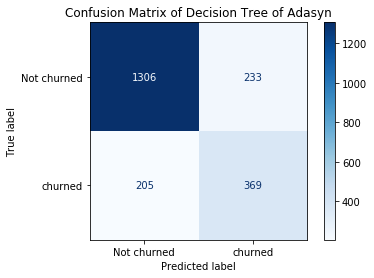

In [107]:
plot_confus_matrix(model_lr_adasyn,'Confusion Matrix of Decision Tree of Adasyn')

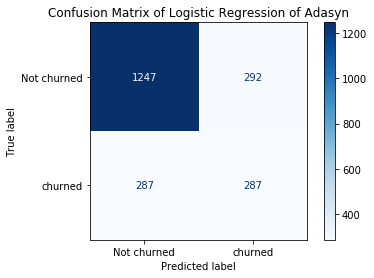

In [108]:
plot_confus_matrix(model_dt_adasyn,'Confusion Matrix of Logistic Regression of Adasyn')

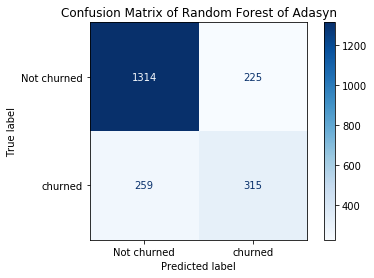

In [109]:
plot_confus_matrix(model_rf_adasyn,'Confusion Matrix of Random Forest of Adasyn')

#### Out of three models Logistic Regression, DecisionTree Classifier and RandomForest Classifier. Logistic Regression is performing well for our dataset with Random OverSampling

### Ensemble Methods

In [110]:
#Bagging_Classifier

In [111]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator = dt)

model_bagging = clf.fit(X_over,y_over)

pred_bagging_over = model_bagging.predict(X_test_new)

In [112]:
print("Accuracy Score:", accuracy_score(y_test_new,pred_bagging_over))
print("Precision Score:", precision_score(y_test_new,pred_bagging_over))
print("Recall Score:", recall_score(y_test_new,pred_bagging_over))

Accuracy Score: 0.7539044013251301
Precision Score: 0.5511363636363636
Recall Score: 0.5069686411149826


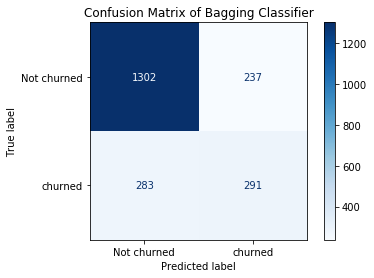

In [113]:
plot_confus_matrix(model_bagging,'Confusion Matrix of Bagging Classifier')

In [114]:
#Gradient_Boosting_Classifier

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

clf_GB = GradientBoostingClassifier(random_state=36)

model_GB = clf_GB.fit(X_over,y_over)

pred_GB= model_GB.predict(X_test_new)

In [116]:
print("Accuracy Score:", accuracy_score(y_test_new,pred_GB))
print("Precision Score:", precision_score(y_test_new,pred_GB))
print("Recall Score:", recall_score(y_test_new,pred_GB))

Accuracy Score: 0.7610033128253668
Precision Score: 0.5391600454029511
Recall Score: 0.8275261324041812


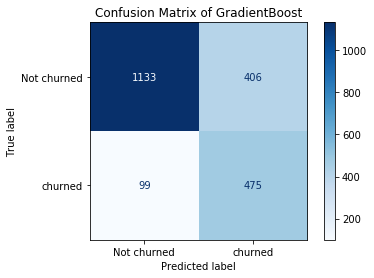

In [117]:
plot_confus_matrix(model_GB,'Confusion Matrix of GradientBoost')

In [118]:
#Adaboost_Classifier

In [119]:
from sklearn.ensemble import AdaBoostClassifier

clf_AD = AdaBoostClassifier(random_state=36)

model_AD = clf_AD.fit(X_over,y_over)

pred_AD= model_AD.predict(X_test_new)

In [120]:
print("Accuracy Score:", accuracy_score(y_test_new,pred_AD))
print("Precision Score:", precision_score(y_test_new,pred_AD))
print("Recall Score:", recall_score(y_test_new,pred_AD))

Accuracy Score: 0.7605300520586843
Precision Score: 0.5378619153674833
Recall Score: 0.8414634146341463


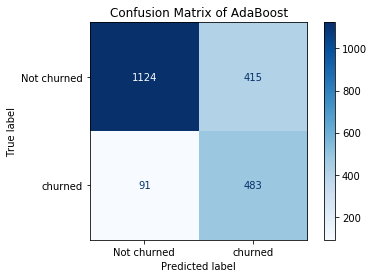

In [121]:
plot_confus_matrix(model_AD,'Confusion Matrix of AdaBoost')

In [122]:
#XGboost_Classifier

In [123]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

model_xgb = xgb_clf.fit(X_over,y_over)

pred_xgb = model_xgb.predict(X_test_new)

In [124]:
print("Accuracy Score:", accuracy_score(y_test_new,pred_xgb))
print("Precision Score:", precision_score(y_test_new,pred_xgb))
print("Recall Score:", recall_score(y_test_new,pred_xgb))

Accuracy Score: 0.767628963558921
Precision Score: 0.5616641901931649
Recall Score: 0.6585365853658537


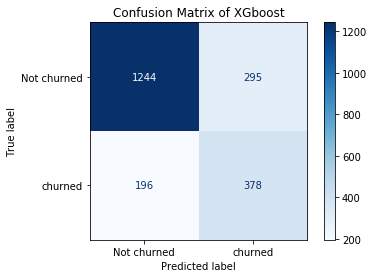

In [125]:
plot_confus_matrix(model_xgb,'Confusion Matrix of XGboost')

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
#Hyperparameter tuning of Logistic Regression

In [128]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2','elasticnet']
c_values = np.logspace(-4, 4, 20)

In [129]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0,verbose=True)
grid_result_lr = grid_search.fit(X_over, y_over)

Fitting 50 folds for each of 180 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 374 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 1334 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 2519 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 3858 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5725 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 8001 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 12.1min finished


In [130]:
print("Best: %f using %s" % (grid_result_lr.best_score_, grid_result_lr.best_params_))

Best: 0.768352 using {'C': 545.5594781168514, 'penalty': 'l2', 'solver': 'lbfgs'}


In [131]:
#Saving model

In [132]:
import joblib

In [133]:
filename = 'logistic_tuned.sav'
joblib.dump(grid_result_lr, filename)

['logistic_tuned.sav']

In [134]:
loaded_model_lr = joblib.load(filename)
pred_lr_tuned = loaded_model_lr.predict(X_test_new)

In [135]:
from sklearn.metrics import f1_score
print("Accuracy Score:", accuracy_score(y_test_new,pred_lr_tuned))
print("Precision Score:", precision_score(y_test_new,pred_lr_tuned))
print("Recall Score:", recall_score(y_test_new,pred_lr_tuned))
print("f1 Score:", f1_score(y_test_new,pred_lr_tuned))

Accuracy Score: 0.7567439659252247
Precision Score: 0.5337837837837838
Recall Score: 0.8257839721254355
f1 Score: 0.6484268125854993


In [136]:
confusion_matrix(y_test_new,pred_lr_tuned)

array([[1125,  414],
       [ 100,  474]], dtype=int64)

In [137]:
#hyperparameter tuning of AdaBoost Classifier

In [138]:
grid_adaboost = dict()
grid_adaboost['n_estimators'] = [10,20,50]
grid_adaboost['learning_rate'] = [0.001, 0.01, 0.1, 1.0]

In [139]:
base = DecisionTreeClassifier(max_depth=1)
model_adaboost = AdaBoostClassifier(base_estimator=base,random_state=54)

cv_ada = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_ada = GridSearchCV(estimator=model_adaboost, param_grid=grid_adaboost, n_jobs=-1, cv=cv_ada, scoring='f1',verbose=True)
grid_result_ada = grid_search_ada.fit(X_over, y_over)
print("Best: %f using %s" % (grid_result_ada.best_score_, grid_result_ada.best_params_))

Fitting 30 folds for each of 12 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   27.2s finished


Best: 0.778319 using {'learning_rate': 1.0, 'n_estimators': 50}


In [140]:
filename_ada = 'adaboost_tuned.sav'
joblib.dump(grid_result_ada, filename_ada)

['adaboost_tuned.sav']

In [141]:
loaded_model_adaboost = joblib.load(filename_ada)
pred_lr_adaboost = loaded_model_adaboost.predict(X_test_new)

In [142]:
from sklearn.metrics import f1_score
print("Accuracy Score:", accuracy_score(y_test_new,pred_lr_adaboost))
print("Precision Score:", precision_score(y_test_new,pred_lr_adaboost))
print("Recall Score:", recall_score(y_test_new,pred_lr_adaboost))
print("f1 Score:", f1_score(y_test_new,pred_lr_adaboost))

Accuracy Score: 0.7605300520586843
Precision Score: 0.5378619153674833
Recall Score: 0.8414634146341463
f1 Score: 0.6562499999999999


In [143]:
confusion_matrix(y_test_new,pred_lr_adaboost)

array([[1124,  415],
       [  91,  483]], dtype=int64)

In [144]:
#base model turned to be the best model in the case

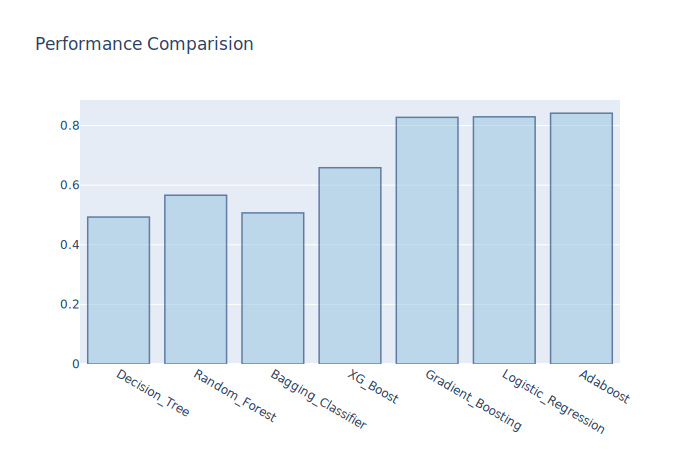

In [145]:
arr = []
names = ['Decision_Tree','Random_Forest','Bagging_Classifier','XG_Boost','Gradient_Boosting','Logistic_Regression','Adaboost']
dt_re = recall_score(y_test_new,pred_dt_random)
rf_re = recall_score(y_test_new,pred_rf_random)
log_re = recall_score(y_test_new,pred_lr_random)
bc_re = recall_score(y_test_new,pred_bagging_over)
xg_re = recall_score(y_test_new,pred_xgb)
gb_re = recall_score(y_test_new,pred_GB)
ad_re =  recall_score(y_test_new,pred_AD)

arr.append(dt_re)
arr.extend([rf_re,bc_re,xg_re,gb_re,log_re,ad_re])

fig = go.Figure([go.Bar(x=names, y=arr)])
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Performance Comparision')
fig.show('svg')